In [ ]:
class Tree:
  def __init__(self, data):
    self.left = None
    self.right = None
    self.data = data

  def __str__(self):
    return str([str(self.data),[self.left.__str__() if self.left else None],[self.right.__str__() if self.right else None]])

  def preorder(self):
    print(self.data)
    if self.left:
      self.left.preorder()
    if self.right:
      self.right.preorder() 

  def push_left(self, val):
    if self.left:
      t = Tree(val)
      t.left = self.left
      self.left = t
    else:
      self.left = Tree(val)

  def push_right(self,val):
    if self.right:
      t = Tree(val)
      t.right = self.right
      self.right = t  
    else:
      self.right = Tree(val)

In [ ]:
tree = Tree(1)
tree.left  = Tree(2)
tree.right = Tree(3)
tree.push_left(4)
tree.push_right(5)
tree.data
print(tree)
tree.preorder()

['1', ['[\'4\', ["[\'2\', [None], [None]]"], [None]]'], ['[\'5\', [None], ["[\'3\', [None], [None]]"]]']]
1
4
2
5
3


1. If the current token is a '(', add a new node as the left child of the current node, and descend to the left child.

2. If the current token is in the list ['+','-','/','*'], set the root value of the current node to the operator represented by the current token. Add a new node as the right child of the current node and descend to the right child.

3. If the current token is a number, set the root value of the current node to the number and return to the parent.

4. If the current token is a ')', go to the parent of the current node.

In [ ]:
def buildParseTree(expr):
  vals = expr.split()
  print(vals)
  ops = ['+', '-', '*', '/']
  fTree = Tree("")
  stack = [fTree]
  tree = fTree

  for v in vals:
    print(v)
    if v == '(':
      # print(v)
      tree.push_left('')
      stack.append(tree)
      # print(tree)
      tree = tree.left
    
    elif v in ops:
        print(v)
        tree.data = v
        tree.push_right('')
        stack.append(tree)
        tree = tree.right

    elif v == ')':
        tree = stack.pop()

    elif v not in [*ops, ')']:
        try:
            tree.data = int(v)
            parent = stack.pop()
            tree = parent

        except ValueError:
            raise ValueError("token '{}' is not a valid integer".format(i))

  return fTree

In [ ]:
pt = buildParseTree("( ( 10 + 5 ) / 3 )")
print(pt)

['(', '(', '10', '+', '5', ')', '/', '3', ')']
(
(
10
+
+
5
)
/
/
3
)
['/', ['[\'+\', ["[\'10\', [None], [None]]"], ["[\'5\', [None], [None]]"]]'], ["['3', [None], [None]]"]]


In [ ]:
import operator
def evaluate(parseTree):
    opers = {'+':operator.add, '-':operator.sub, '*':operator.mul, '/':operator.truediv}

    leftC = parseTree.left
    rightC = parseTree.right

    if leftC and rightC:
        fn = opers[parseTree.data]
        return fn(evaluate(leftC),evaluate(rightC))
    else:
        return parseTree.data

In [ ]:
evaluate(pt)

5.0

#Lifted from PSADS book $\S 7.8$

In earlier sections you learned about the first-in first-out data structure called a queue. One important variation of a queue is called a priority queue. A priority queue acts like a queue in that you dequeue an item by removing it from the front. However, in a priority queue the logical order of items inside a queue is determined by their priority. The highest priority items are at the front of the queue and the lowest priority items are at the back. Thus when you enqueue an item on a priority queue, the new item may move all the way to the front. We will see that the priority queue is a useful data structure for some of the graph algorithms we will study in the next chapter.

You can probably think of a couple of easy ways to implement a priority queue using sorting functions and lists. However, inserting into a list is $O(n)$  and sorting a list is $O(n\log n)$ . We can do better. The classic way to implement a priority queue is using a data structure called a 'binary heap'. A binary heap will allow us both enqueue and dequeue items in $O(\log n)$.

The binary heap is interesting to study because when we diagram the heap it looks a lot like a tree, but when we implement it we use only a single list as an internal representation. The binary heap has two common variations: the 'min heap', in which the smallest key is always at the front, and the' max heap', in which the largest key value is always at the front. 


In order to make our heap work efficiently, we will take advantage of the logarithmic nature of the binary tree to represent our heap. In order to guarantee logarithmic performance, we must keep our tree balanced. A balanced binary tree has roughly the same number of nodes in the left and right subtrees of the root. In our heap implementation we keep the tree balanced by creating a complete binary tree. A complete binary tree is a tree in which each level has all of its nodes. The exception to this is the bottom level of the tree, which we fill in from left to right. Figure 1 shows an example of a complete binary tree.



### Notes on heap definitions
'heap order property' In a heap, for every node $x$  with parent $p$, the key in $p$ is smaller than or equal to the key in $x$. AKA, kids are more than or equal to their parents


In [ ]:
class BinaryHeap:
    def __init__(self):
        self._heap = []

    def _perc_up(self, cur_idx):
        while (cur_idx - 1) // 2 >= 0:
            parent_idx = (cur_idx - 1) // 2
            if self._heap[cur_idx] < self._heap[parent_idx]:
                self._heap[cur_idx], self._heap[parent_idx] = (
                    self._heap[parent_idx],
                    self._heap[cur_idx],
                )
            cur_idx = parent_idx

    def _perc_down(self, cur_idx):
        while 2 * cur_idx + 1 < len(self._heap):
            min_child_idx = self._get_min_child(cur_idx)
            if self._heap[cur_idx] > self._heap[min_child_idx]:
                self._heap[cur_idx], self._heap[min_child_idx] = (
                    self._heap[min_child_idx],
                    self._heap[cur_idx],
                )
            else:
                return
            cur_idx = min_child_idx

    def _get_min_child(self, parent_idx):
        if 2 * parent_idx + 2 > len(self._heap) - 1:
            return 2 * parent_idx + 1
        if self._heap[2 * parent_idx + 1] < self._heap[2 * parent_idx + 2]:
            return 2 * parent_idx + 1
        return 2 * parent_idx + 2

    def heapify(self, not_a_heap):
        self._heap = not_a_heap[:]
        cur_idx = len(self._heap) // 2 - 1
        while cur_idx >= 0:
            self._perc_down(cur_idx)
            cur_idx = cur_idx - 1

    def get_min(self):
        return self._heap[0]

    def insert(self, item):
        self._heap.append(item)
        self._perc_up(len(self._heap) - 1)

    def delete(self):
        self._heap[0], self._heap[-1] = self._heap[-1], self._heap[0]
        result = self._heap.pop()
        self._perc_down(0)
        return result

    def is_empty(self):
        return not bool(self._heap)

    def __len__(self):
        return len(self._heap)

    def __str__(self):
        return str(self._heap)


In [ ]:
aheap = BinaryHeap()
aheap.heapify([9, 5, 6, 2, 3,11, 15,-1, 13,84])
aheap._heap

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

We say a simple implementation of a 'heap' above and implementaed a class in order to move around and manipulate the tree. But we have not discussed simply using a 'List' container to store our data. If we did, we need to know how to move up and down the tree via indexing. This was alluded to in the prior work, but we can figure it out with more certainity. 

First, we can look at a generic binary tree that is fully populated for 3 **levels**. 

There are a few observations we can make based on the structure. We will continure using base zero indexing for consistency with the 'List' container. 

| level $\ell$ | nodes numbers  | # of nodes|
| :---  | :------------: | ---: |
| 0     | 0 | 1|
|1| 1, 2| 2|
|2| 2, 4, 5, 6| 4|
|3| 7, 8, 9, 10, 11, 12, 13, 14| 8|

**Observations**
 * the number of nodes per level is $2^\ell$
 * the index of the nodes range from $[2^\ell -1 \rightarrow 2^{\ell +1} -2] = [2^\ell -1 \rightarrow 2(2^{\ell} -1)] $
 * the parent with index $i$ has children at $(2i+1, 2i+2)$
 * the child with index $c$ can find its parent at $c//2 -1$





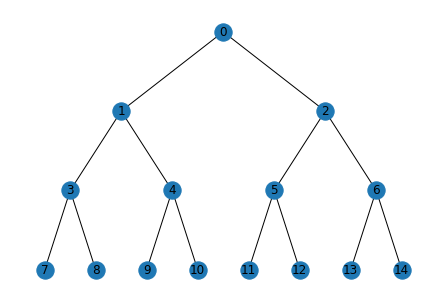

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from EoN import hierarchy_pos
from numpy import log2

G=nx.Graph()
simple_bin = list(range(8))
levels = int(log2(len(simple_bin)))

for i in range(levels):
  num_nodes = 2**i
  for n in range(num_nodes-1, 2*(num_nodes-1)+1):    
    G.add_edges_from([(n, 2*n+1)])
    G.add_edges_from([(n, 2*n+2)])

pos = hierarchy_pos(G,0)    
nx.draw(G, pos=pos, with_labels=True)

#QUESTION 
How does this change if we are implementing a quad-tree (each node has 4 children)?

Try to determine in particular:
* if a parent is index $p$ what is the index of its four children?
* if a child is index $c$ what is the index of its parent?
* given a list with distinct nodes to populate the tree, how many levels do we need to go down to place all of them? 


Modify the above code to plot out a quad-tree with 3 levels.